In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory('/Volumes/Mohs\'s_SSD/My-ML-DL-Projects/DeepLearning_Models/DataSets/chest_xray/train')
data_test = tf.keras.utils.image_dataset_from_directory('/Volumes/Mohs\'s_SSD/My-ML-DL-Projects/DeepLearning_Models/DataSets/chest_xray/test')
data_val = tf.keras.utils.image_dataset_from_directory('/Volumes/Mohs\'s_SSD/My-ML-DL-Projects/DeepLearning_Models/DataSets/chest_xray/val')

Found 5232 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 8 files belonging to 2 classes.


In [9]:
data_train = data_train.map(lambda x,y: (x/255, y))
data_iterator = data_train.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[0].shape

(32, 256, 256, 3)

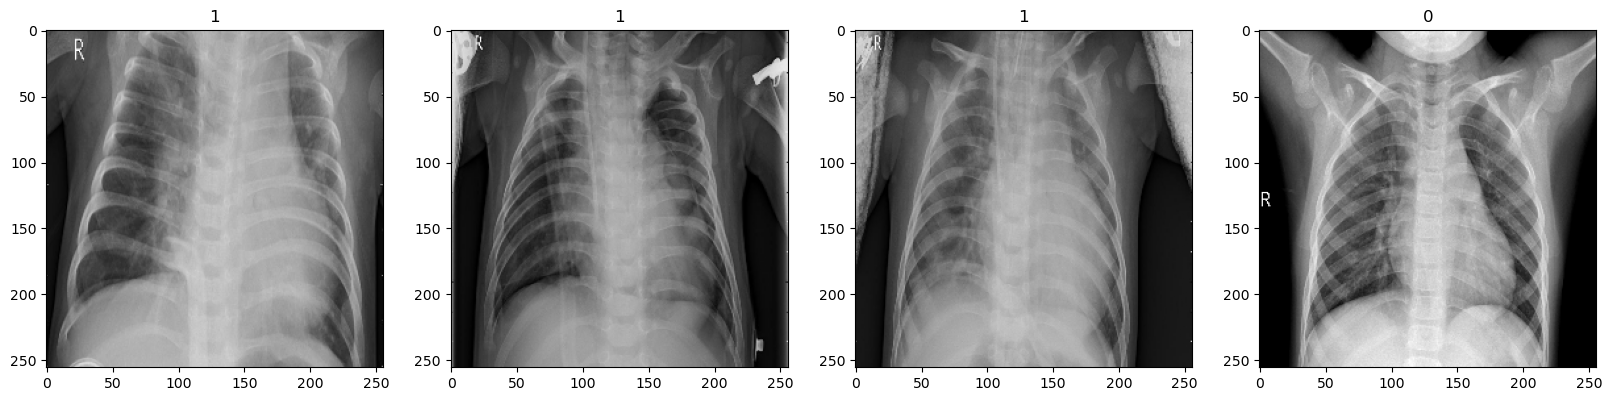

In [12]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

    # 1 = pneumonia , 0 = healthy

In [13]:
from tensorflow.keras.models import Sequential #one input and one output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [ ]:
#input layer 16 filters 3x3 in size moves 1 pixel each time
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #ReLu helps take into account non-Linear patterns
model.add(MaxPooling2D()) #takes the maximum value after ReLu activation so it technicaly condenses/halves the data

#32 filters 3x3 moves 1 
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#16 filters 3x3 moves 1
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Condences the values down into a single dimension
model.add(Flatten())

#dense layers that are fully connected
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/mohamedsaba/miniforge3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#adam is an optimizer, this is technicaly a binary classification problem so thats our losses
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,774,817 (56.36 MB)

 Trainable params: 14,774,817 (56.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
hist = model.fit(data_train, epochs = 20, validation_data = data_val)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.9487 - loss: 0.1347 - val_accuracy: 0.7500 - val_loss: 167.8044
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 32s 196ms/step - accuracy: 0.9649 - loss: 0.0927 - val_accuracy: 0.6250 - val_loss: 512.5004
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9712 - loss: 0.0813 - val_accuracy: 0.6250 - val_loss: 343.1319
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9719 - loss: 0.0791 - val_accuracy: 0.6250 - val_loss: 527.7875
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.9781 - loss: 0.0621 - val_accuracy: 0.8750 - val_loss: 117.9037
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 30s 181ms/step - accuracy: 0.9829 - loss: 0.0503 - val_accuracy: 0.7500 - val_loss: 231.0778
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.9867 - loss: 0.0413 - val_accuracy: 0.6250 - val_loss: 377.7227
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.

In [21]:
model.evaluate(data_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.7571 - loss: 621.9454


[540.55615234375, 0.7804487347602844]